In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json

In [2]:
log_list = os.listdir("./01.log")
sorted_logs = sorted(log_list, key=lambda x: int(x.split('_')[1]))
print(sorted_logs)


['ver_30_2024-04-20_16-52-02.log']


In [3]:
log_ = sorted_logs[-1]
f = open(os.path.join("./01.log", log_))
lines = f.readlines()
print(log_)

ver_30_2024-04-20_16-52-02.log


In [4]:
json_object = json.loads( lines[0].replace("\n","").replace("'", '"') )
print(json_object)

{'epoch': 0, 'iteration': 0, 'iteration_by_epoch': 0, 'total loss': '24.35511', 'rpn loss': '23.10685', 'class loss': '1.24826', 'batch_size': 4, 'lr': 0.005}


In [5]:
from collections import defaultdict
log_dict = defaultdict(list)

for line in lines:
    json_object = json.loads( line.replace("\n","").replace("'", '"') )
    for key in json_object:
        log_dict[key].append(json_object[key])

Text(0, 0.5, 'Loss')

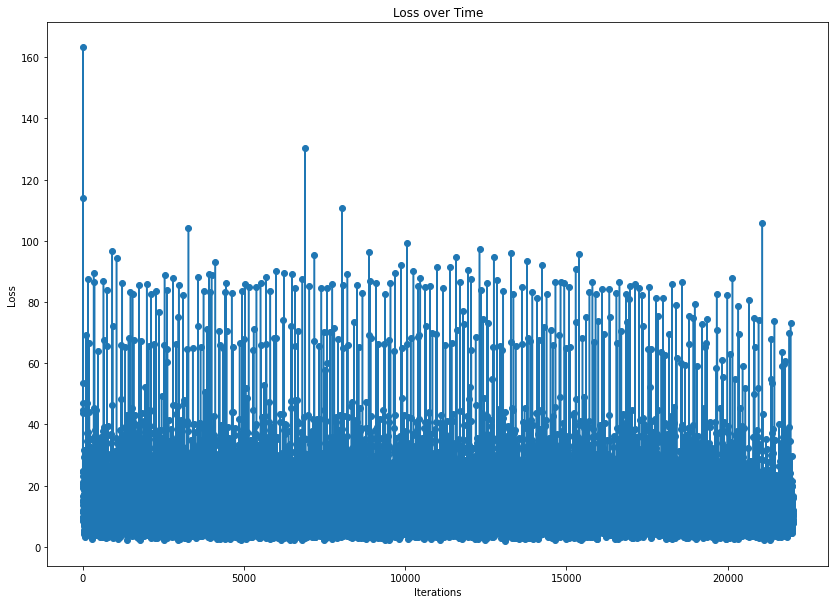

In [6]:
losses = [float(i) for i in log_dict['rpn loss'] if float(i) < 400]
# Plot loss over time
plt.figure(figsize=(14, 10))
plt.plot(losses, marker='o', linestyle='-')
plt.title('Loss over Time')
plt.xlabel('Iterations')
plt.ylabel('Loss')

Text(0, 0.5, 'Dice')

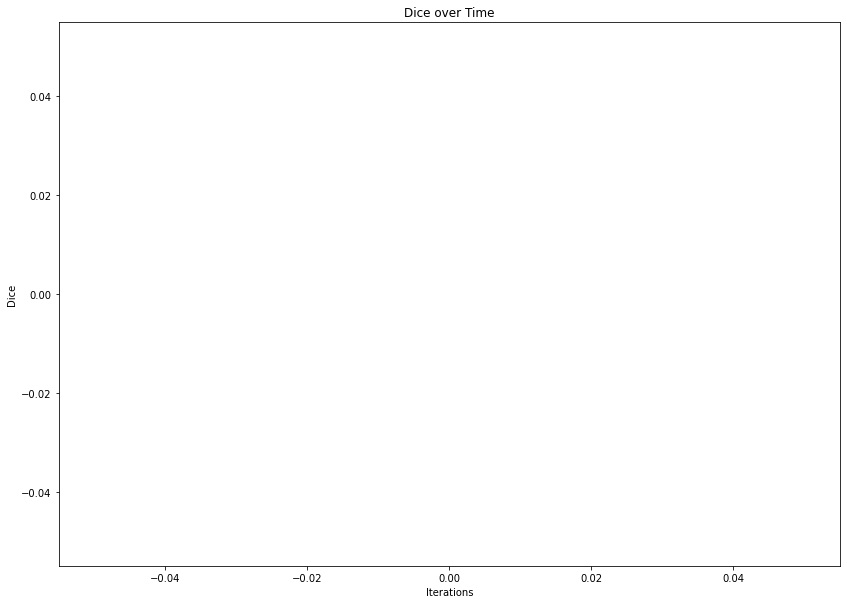

In [7]:
dices = [float(i) for i in log_dict['dice']]
# Plot loss over time
plt.figure(figsize=(14, 10))
plt.plot(dices, marker='o', linestyle='-',color='green')
plt.title('Dice over Time')
plt.xlabel('Iterations')
plt.ylabel('Dice')

Text(0, 0.5, 'LR')

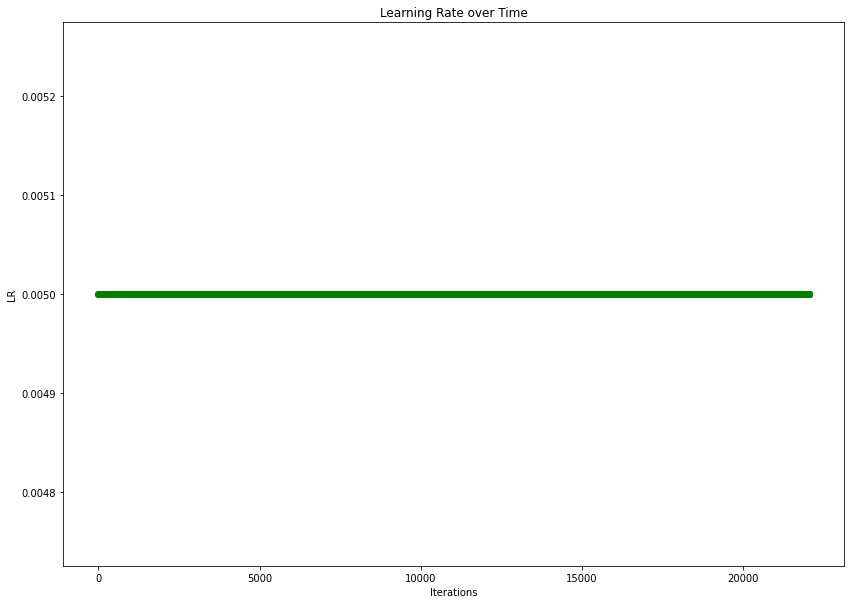

In [8]:
dices = [float(i) for i in log_dict['lr']]
# Plot loss over time
plt.figure(figsize=(14, 10))
plt.plot(dices, marker='o', linestyle='-',color='green')
plt.title('Learning Rate over Time')
plt.xlabel('Iterations')
plt.ylabel('LR')